In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 데이터 불러오기
df_gas = pd.read_csv('./data/data_gas.csv')
df_weather = pd.read_csv('./data/data_weather.csv')

In [3]:
# 최종 데이터를 위해서 따로 준비
df = df_weather

**해당 도시 기온 * (해당 도시 도시가스 가구 수 / 전국 도시가스 가구 수)를 한 값을 전국으로 구해서 합침**

In [4]:
# 각각의 컬럼의 해당 연도의 전체 도시가스 가구의 해당 지역의 도시가스 가구 비중을 곱하여 계산
for i in range(2, len(df_weather)) :
    for j in range(0, len(df_weather)):
        try :
            num_Region = df.columns[i][:-2]
            num_Year = df[df.columns[0]][j]
            num_weight = df_gas[num_Region][df_gas[df_gas['Year'] == num_Year].index[0]]
            num_score = df[df.columns[i]][j] * num_weight
            df[df.columns[i]][j] = df[df.columns[i]][j] * num_weight
        except :
            continue

C:\Users\USER\AppData\Local\Temp\ipykernel_7536\1682360929.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.columns[i]][j] = df[df.columns[i]][j] * num_weight


In [5]:
# 각각의 값을 담을 리스트 생성
list_AT = []
list_LT = []
list_HT = []

# 리스트에 빈값 채우기
for k in range(0, 300) :
    list_AT.append(0)
    list_LT.append(0)
    list_HT.append(0)

# 평균을 구하기 위한 값 지정
num_count_AT = 0
num_count_LT = 0
num_count_HT = 0

# 각 값이 포함된 컬럼을 합치기
for i in range(0, len(df.columns)) :
    if 'AT' in df.columns[i] : 
        num_count_AT += 1
        list_AT += df[df.columns[i]]
    elif 'LT' in df.columns[i] : 
        num_count_LT += 1
        list_LT += df[df.columns[i]]
    elif 'HT' in df.columns[i] : 
        num_count_HT += 1
        list_HT += df[df.columns[i]]

# 합쳐진 각 값의 평균 구하기
list_AT = list_AT / num_count_AT
list_LT = list_LT / num_count_LT
list_HT = list_HT / num_count_HT

In [6]:
# 연도, 월이 추가된 데이터 생성
df_all = pd.DataFrame([list_AT, list_LT, list_HT]).T
df_all.columns = ['AT', 'LT', 'HT']
df_all.insert(0, 'Year', df['Year'])
df_all.insert(1, 'Month', df['Month'])

In [7]:
# 데이터 저장
df_all.to_csv('./data_gas_weather.csv', index=False)

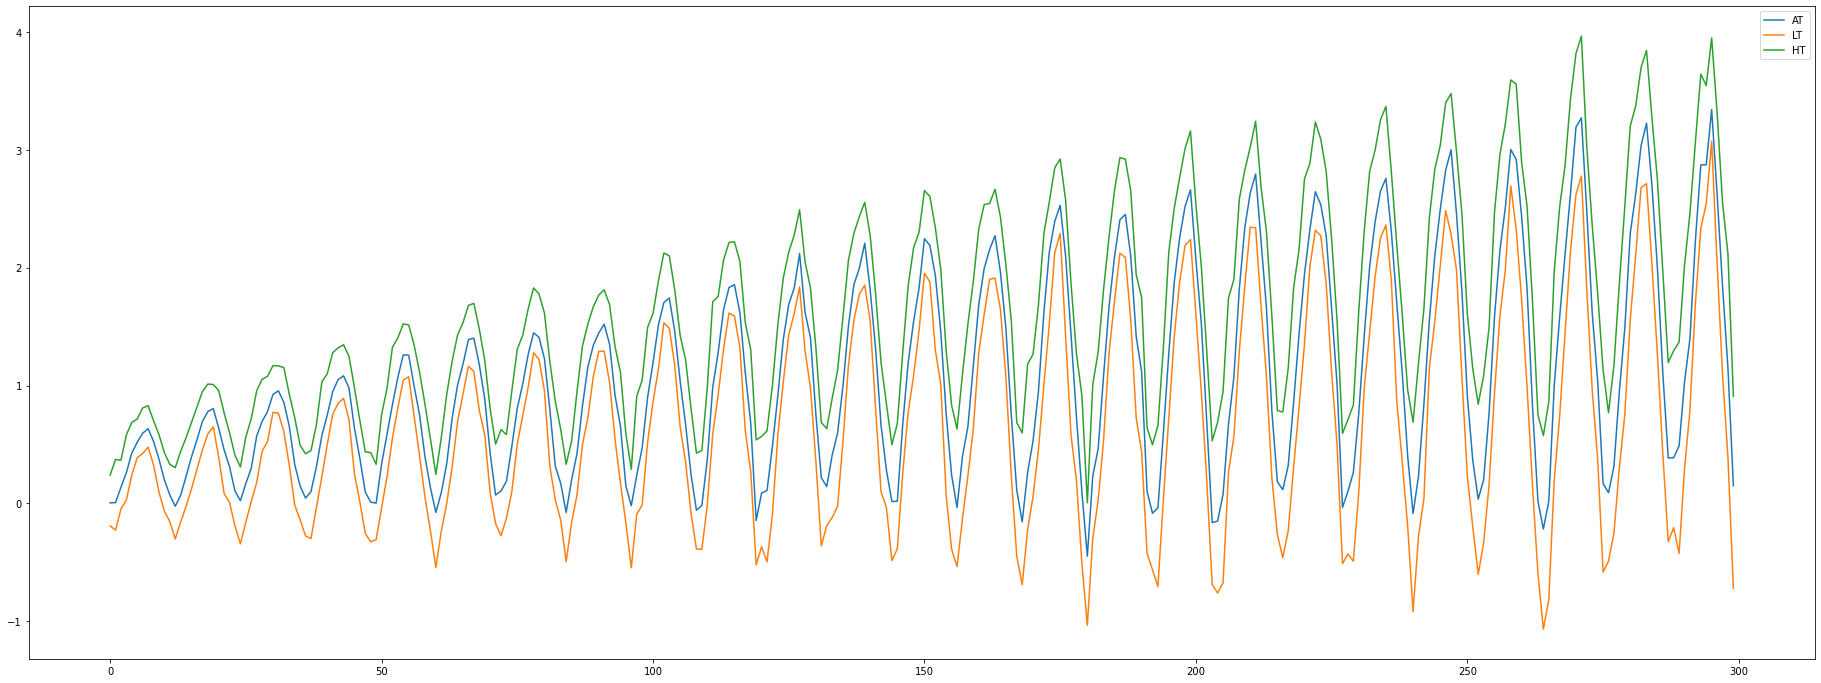

In [8]:
# 데이터 살피기
df_all_temp = df_all.drop(['Year', 'Month'], axis=1)

plt.figure(figsize=(32,12))
plt.plot(df_all_temp)
plt.legend(df_all_temp.columns)
plt.show()